# Mammalian Sleep Patterns

This tutorial is intended to give you a brief overview about how to analyze data with `krangl` and `lets-plot` package. For further information see

* https://github.com/holgerbrandl/krangl
* https://github.com/JetBrains/lets-plot-kotlin

We will learn how to quickly create a variety of different plots and how to adapt plots to our specific needs.

Let's get started by pulling `krangl` into this environment.

In [1]:
// @file:Repository("*mavenLocal")
@file:DependsOn("com.github.holgerbrandl:krangl:0.17")

We also add lets-plot (using the legacy style syntax with `%use`)

In [2]:
%use lets-plot

Note: In contrast to R and python, we can use versioned dependencies here, which keeps our analysis reproducible even if the underlying libraries evolve.

## The lets-plot ggplot syntax

`letsplot` adopts the API of https://ggplot2.tidyverse.org/.
The ggplot syntax is used to build a plot layer by layer. Usually, the following steps are involved

* Defining the data to be used in the plot with ggplot(«data.frame»)
* Specifying the visual representation of the data with geoms, i.e., `geomPoint()` or `geomLine()`
* Specifying the features or aesthetics to represent the values in the plot with aes()
* Optionally modifying scales, labels or adding additional layers

Note: The underlying data is by default the same for all layers.

**Important note: In this tutorial data is always considered to be shaped as data-frame. However, `letsplot` also allows visualizing data shaped differently.**



# Data: Mammals Sleep

The famous `sleepData` dataset contains the sleep times and weights for a set of mammalian species. The dataset contains 83 rows and 11 variables.

The dataset ships with `krangl` as an example dataset, so there is no need to download it from elsewhere.

See [here](https://ggplot2.tidyverse.org/reference/msleep.html) for further reference.

In [3]:
sleepData

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,null,null,11.9,null,50.0
Owl monkey,Aotus,omni,Primates,null,17.0,1.8,null,7.0,0.0155,0.48
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,null,9.6,null,1.35
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333333,9.1,2.9E-4,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666666667,20.0,0.423,600.0
Three-toed sloth,Bradypus,herbi,Pilosa,null,14.4,2.2,0.766666667,9.6,null,3.85


Let's also get an idea about the types of the individual attributes/columns

In [4]:
sleepData.schema()

Name,Type,Values,name,[Str],"Cheetah, Owl monkey, Mountain beaver, Greater short-tailed shrew, Cow, Three-toed sloth, Northern fu...",genus,[Str],"Acinonyx, Aotus, Aplodontia, Blarina, Bos, Bradypus, Callorhinus, Calomys, Canis, Capreolus, Capri, ...",vore,[Str],"carni, omni, herbi, omni, herbi, herbi, carni, , carni, herbi, herbi, herbi, omni, herbi, omni, ...",order,[Str],"Carnivora, Primates, Rodentia, Soricomorpha, Artiodactyla, Pilosa, Carnivora, Rodentia, Carnivora, A...",conservation,[Str],"lc, , nt, lc, domesticated, , vu, , domesticated, lc, lc, domesticated, lc, domesticated...",sleep_total,[Dbl],"12.1, 17, 14.4, 14.9, 4, 14.4, 8.7, 7, 10.1, 3, 5.3, 9.4, 10, 12.5, 10.3, 8.3, 9.1, 17.4, 5.3, 18, 3...",sleep_rem,[Dbl],", 1.8, 2.4, 2.3, 0.7, 2.2, 1.4, , 2.9, , 0.6, 0.8, 0.7, 1.5, 2.2, 2, 1.4, 3.1, 0.5, 4.9,...",sleep_cycle,[Dbl],", , , 0.133, 0.667, 0.767, 0.383, , 0.333, , , 0.217, , 0.117, , <NA...",awake,[Dbl],"11.9, 7, 9.6, 9.1, 20, 9.6, 15.3, 17, 13.9, 21, 18.7, 14.6, 14, 11.5, 13.7, 15.7, 14.9, 6.6, 18.7, 6...",brainwt,[Dbl],", 0.015, , 0, 0.423, , , , 0.07, 0.098, 0.115, 0.005, , 0.006, 0.001, 0.007,...",bodywt,[Dbl],"50, 0.48, 1.35, 0.019, 600, 3.85, 20.49, 0.045, 14, 14.8, 33.5, 0.728, 4.75, 0.42, 0.06, 1, 0.005, 3..."


We find: In total, 83 species are listed with various categorical and numeric attributes describing their physique and their sleeping behavior.

# Building a first plot

To get started with, we calculate a new attribute that puts total sleep and rem-sleep into proportion. In other words, we calculate the proportion in which animals are _dreaming_.

In [5]:
var sleepDataExt = sleepData.addColumn("rem_proportion"){it["sleep_rem"]/it["sleep_total"]}

In [6]:
sleepDataExt.select{startsWith("sleep") AND listOf("rem_proportion")}

sleep_total,sleep_rem,sleep_cycle,rem_proportion
12.1,null,null,null
17.0,1.8,null,0.10588235294117647
14.4,2.4,null,0.16666666666666666
14.9,2.3,0.133333333,0.15436241610738252
4.0,0.7,0.666666667,0.175
14.4,2.2,0.766666667,0.1527777777777778


We find: As usual, some records contain missing values, so `rem_proportion` is computed as `NA` (or `null` in _kotlinspeak_).

In [7]:
sleepDataExt.letsPlot { }

As expected nothing happens, because we have not mapped variables to aesthetics yet. Let's do so now:

In [8]:
sleepDataExt.letsPlot {x="sleep_total"; y="rem_proportion" } + geomPoint()

Plots can be assigned to variables for composition and visual exploration:

In [9]:
val myPlot = sleepDataExt.letsPlot {x="sleep_total"; y="rem_proportion" } + geomPoint()
myPlot

Clearly we can export plots, e.g. as svg

In [10]:
ggsave(myPlot, "testplot.svg")

D:\projects\misc\krangl\examples\jupyter\lets-plot-images\testplot.svg

# Mapping data attributes to aesthetics

We did so already in when plotting x against y. The concept extends to other visual attributes such as size, shape, symbols or labels as well.

Constant aesthetics are specified outside of mapping. Here, we specify fixed values for size and transparency.

In [11]:
sleepDataExt.letsPlot {x="sleep_total"; y="rem_proportion" }     +  
        geom_point(size=4, alpha=0.3)

Instead of mapping to fixed values, we can also map columns (variables) in our dataset to visual attributes such as the color.

In [12]:
sleepDataExt
    .letsPlot {x="sleep_total"; y="rem_proportion"; color="vore" } +  
    geomPoint(size=4, alpha=.7)

We find: At first glance there is no striking correlation pattern wrt food preference.

The `alpha` was set to accommodate possible over-plotting, i.e. overlapping points.

Still we don't see much of pattern here, so let's bring in another attribute: We map the average brain size of each species to the point size 

In [13]:
sleepDataExt
    .letsPlot {x="sleep_total"; y="rem_proportion"; color="vore"; size="brainwt" } +  
    geomPoint(size=4, alpha=.7) 


Line_25.jupyter-kts (2:67 - 71) Unresolved reference: size

This does not work, see chapter about `letsplot` limitations.

# Multiple layers

To perform a distribution analysis, a histogram comes to mind. Luckily we can use the same paradigm - mapping of data attribute to aesthetics - here.

In [14]:
sleepDataExt.letsPlot { x="sleep_total"} + geomHistogram(binWidth = 2)

This looks good, but we still can't easily compare groups while keeping an eye on the raw data. So let's try out a [boxplot](https://en.wikipedia.org/wiki/Box_plot) instead. 

In [15]:
sleepDataExt.letsPlot { x="vore"; y="sleep_total"} + geomBoxplot()

It's the nature of a boxplot to just display quantiles of distribution. So we lost track of outliers, and the overall possible multi-modal shape of the distributions.

Luckily, we can superimpose a second layer here to show the raw data as well.

In [16]:
sleepDataExt.letsPlot { x="vore"; y="sleep_total"} +
    geomBoxplot() + 
    geomPoint()

This looks good, but the points all being aligned horizontally lacks beauty, so we randomize their position on along x.

In [17]:
sleepDataExt.letsPlot { x="vore"; y="sleep_total"} +
    geomBoxplot() + 
    geomPoint(position=positionJitter(0.3))

We find: Overlaying the boxplot with the raw data paid off right away. First the groups have different sizes, and the insects show a bi-modal distribution in total sleep time.

# Conservation Status

To better understand our dataset, we want to understand how conservation status and food preference relate to each other.

Conservation_status (Source Wikipedia):
* cd = (Conservation Dependent, now part of NT), stable and sizable populations depend on sustained conservation activity. 
* Domesticated 
* en = Endangered (EN): faces a high risk of extinction in the near future. 
* lc = LC (Least Concern) species that have been evaluated and found to be so common that no conservation concern is projected in the foreseeable future. 
* nt = NT (Near Threatened: close to qualifying for listing as Vulnerable but not fully meeting those criteria; slowly declining or fairly small populations but probably no danger of going extinct even without conservation activity in the foreseeable future, or threats suspected to affect taxon in the near future but still avoidable 
* vu =Vulnerable (VU): faces a considerable risk of extinction in the medium term

Let check the overall distribution in our data set

In [18]:
sleepDataExt.letsPlot { x="conservation"} + geomBar()

We find: The majority of the species in our dataset is not being endangered.

Let's spice this up by adding the food preference.

In [19]:
sleepDataExt.letsPlot { x="conservation"; fill="vore"} +
    geomBar()

... or plot with both attributes being flipped

In [20]:
sleepDataExt.letsPlot { x="vore"; fill="conservation"} +
    geomBar()

We find: Endangered species seem enriched in carnivore and herbivore. However, there is a large proportion of missing values here, so our finding feels inconclusive.

To display the same data also in proportional terms, we can simply adjust the style:

In [21]:
sleepDataExt.letsPlot { x="vore"; fill="conservation"} + 
    geomBar(position=Pos.fill)

# Scales

Scales are required to give the plot reader a sense of reference and thus encompass the ideas of both axes and legends on plots.

`ggplot2` will usually automatically choose appropriate scales and display legends if necessary.

It is however, very easy to override or modify the default values.

The scale syntax is scale_«attribute»_«optional subspecification»() i.e. `scale_x_continuous()` or `scale_x_discrete()` or `scale_x_log10()`


Although being just 83 records, this dataset is very rich. Let's analyze the data for possible correlation between physical dimensions and sleep properties.

In [22]:
val corPlot = sleepData.letsPlot { x="bodywt"; y="sleep_total"} + 
    geomPoint()

In [23]:
corPlot + xlab("Body Weight")

We find: It's hard to analyze the plot because some outliers. We could filter them away first:

In [24]:
sleepData
    .filter{it["bodywt"] lt 2000}
    .letsPlot { x="bodywt"; y="sleep_total"} + 
    geomPoint()

But then we would just study some subset. So as alternative, we can also modulate the scale on the x.

In [25]:
corPlot + xlab("Body Weight") + scaleXLog10()

It's hard to see correlation so let's overlay the display with a regression model.

In [26]:
corPlot + 
    xlab("Body Weight") + 
    scaleXLog10() +
    geomSmooth() + 
    ggtitle("Correlation between sleep time and body weight")

Technically, we can always fit a linear trend model here, but 
We find: There is no strong correlation between sleep time and body weight. But we never know without asking the data. A negative result can be as informative as a positive finding.

# Faceting

The ggplot2 package provides two interesting functionalities to look at subgroups in your data. Also `letsplot` as well `kravis` support this great function.

Faceting is useful to split the data into different groups that are displayed next to each other.

In [27]:
sleepData.letsPlot { x="bodywt"; y="sleep_total"} +
    geomPoint() +
//     scaleXLog10("Body Weight") + 
//     scaleYLog10("Sleep Time") + 
    facetWrap("vore") + // no scales argument?
    ggtitle("Correlation Total Sleep Time and Body Weight per Species")

We find: Since the panels are sharing the same axes ranges, we still face the outlier problem.

Decoupling the axes seems not possible with `letsplot` at the moment.

The good news: There is an emerging data-science ecosystem in Kotlin, sow we could use a different library such as [kravis](https://github.com/holgerbrandl/kravis). `kravis` is a wrapper around R/ggplot and has more complex setup requirements.

First, we load the kravis library into this environment:

In [28]:
@file:DependsOn("com.github.holgerbrandl:kravis:0.8.1")

Second, we rebuild the plot using the highly similar `kravis` API (because as well as `letplots`) its foundation is `ggplot2` from R.

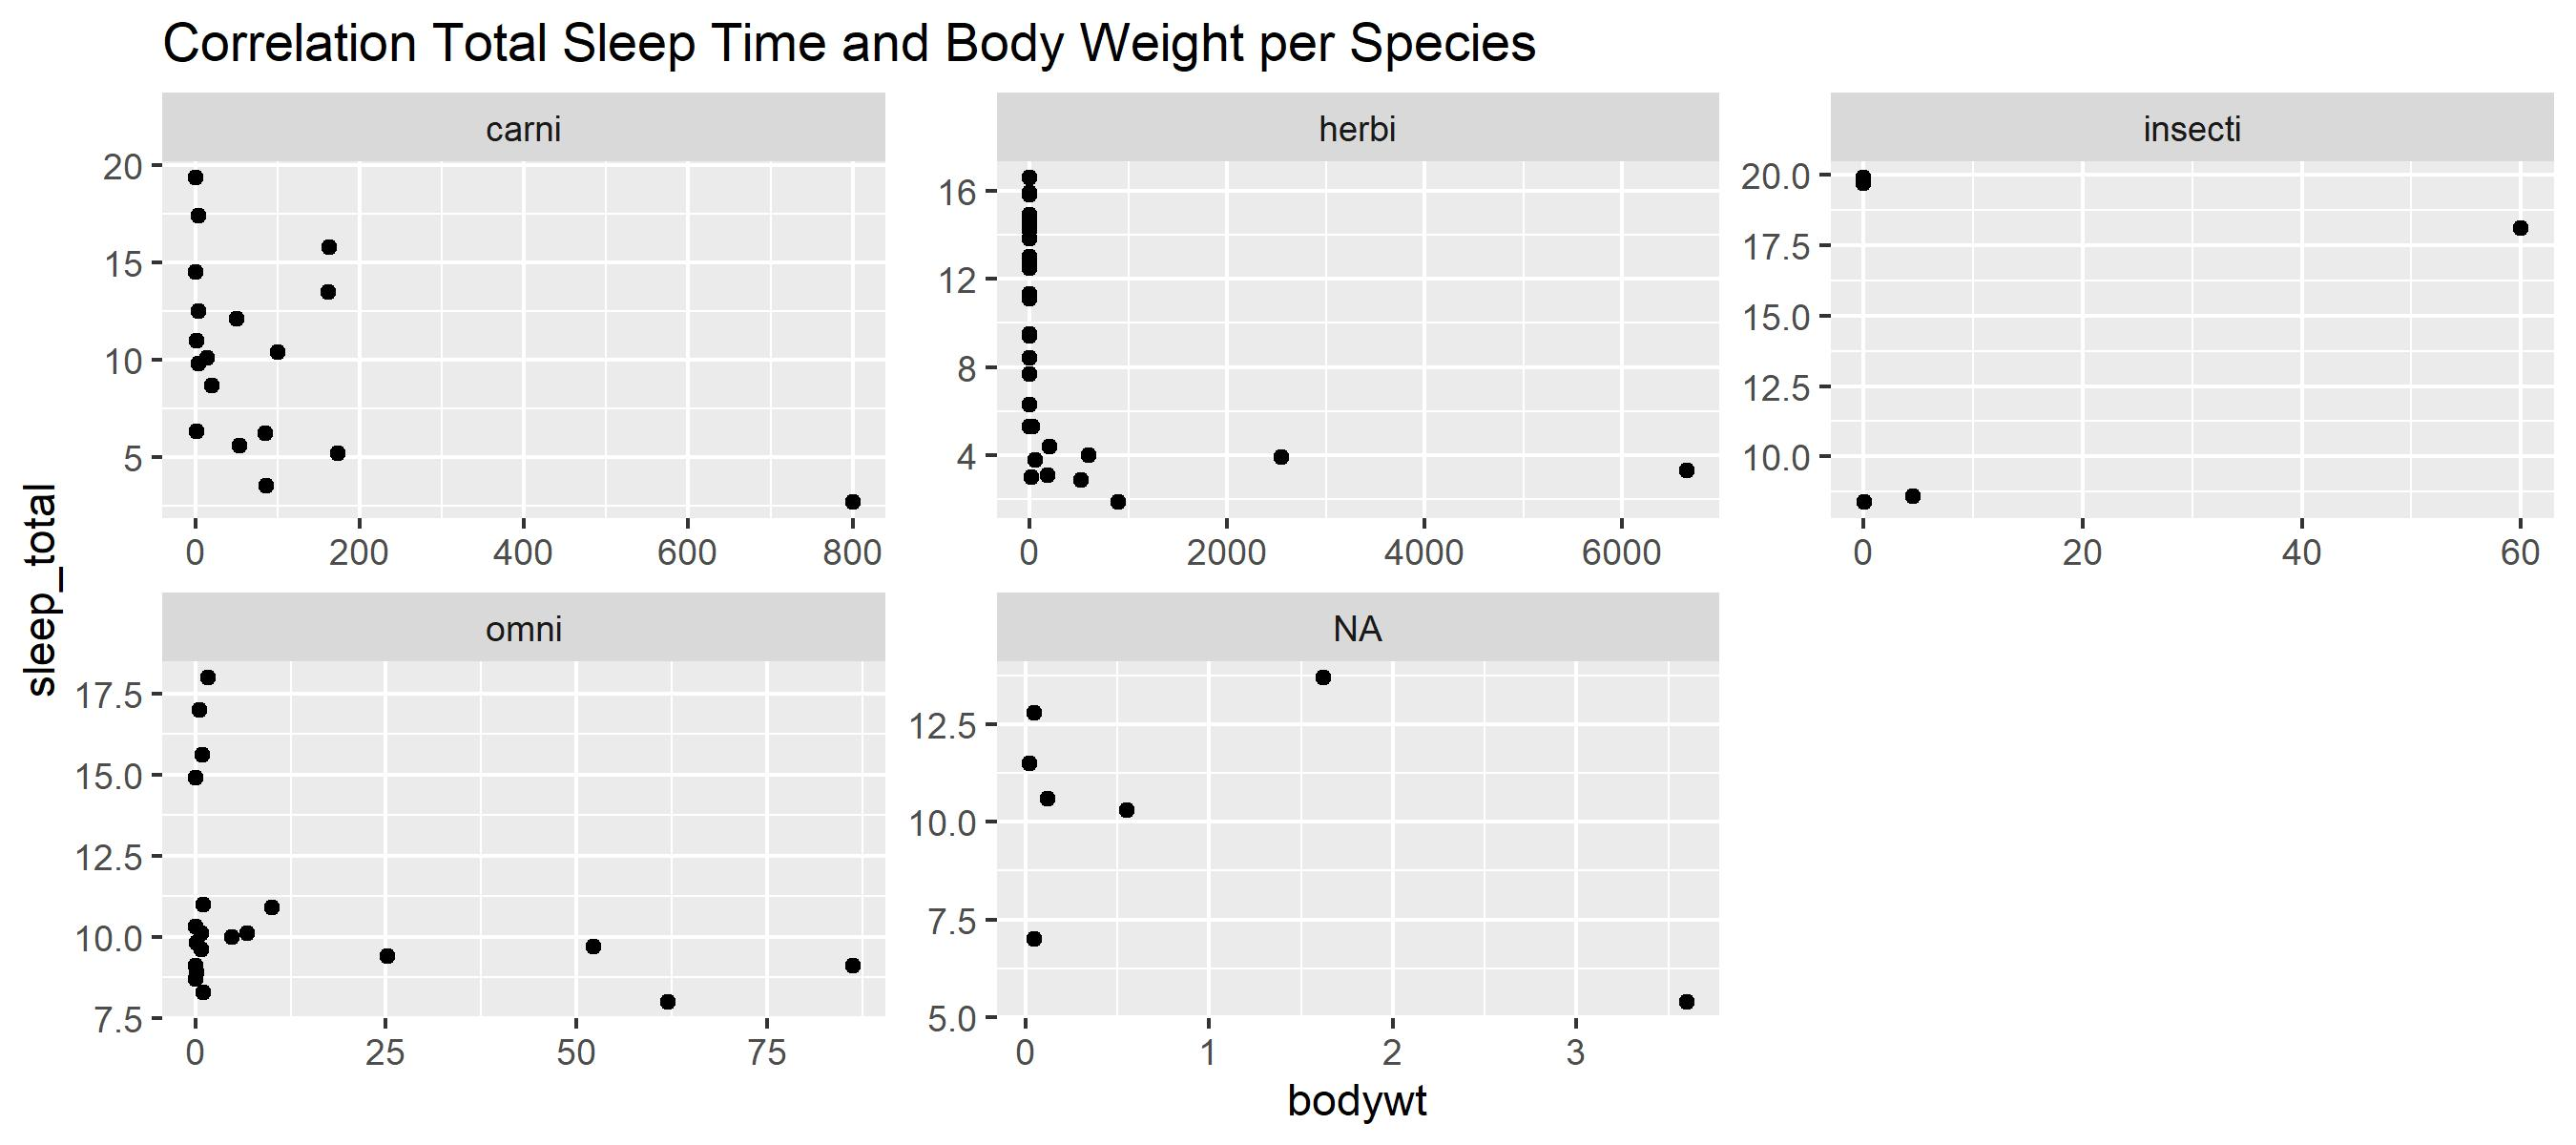

In [29]:
sleepData.plot( x="bodywt", y="sleep_total")
    .geomPoint()
    .facetWrap("vore", scales=FacetScales.free)
    .title("Correlation Total Sleep Time and Body Weight per Species")

We find: There is no obvious correlation if when analyzing the data separately per food preference.

# Limitations

One motivation of the author of this tutorial was to assess the current capabilities of `letsplot`. It has undergone a great and amazing evolution over the last 2 years and provides a great API experience and a wide range of plotting capabilities.

As always there a few shortcomings, that are to some extent personal taste or maybe just areas where the library is still under development.

## No theming

Note: Currently there does not seem to be a way to modify the style of the plot, also known as _theming_. See also https://github.com/JetBrains/lets-plot/issues/221. 



So let's rebuild the plot with kravis. Note the call the `theme*` to adjust the overall appearance of the plot.

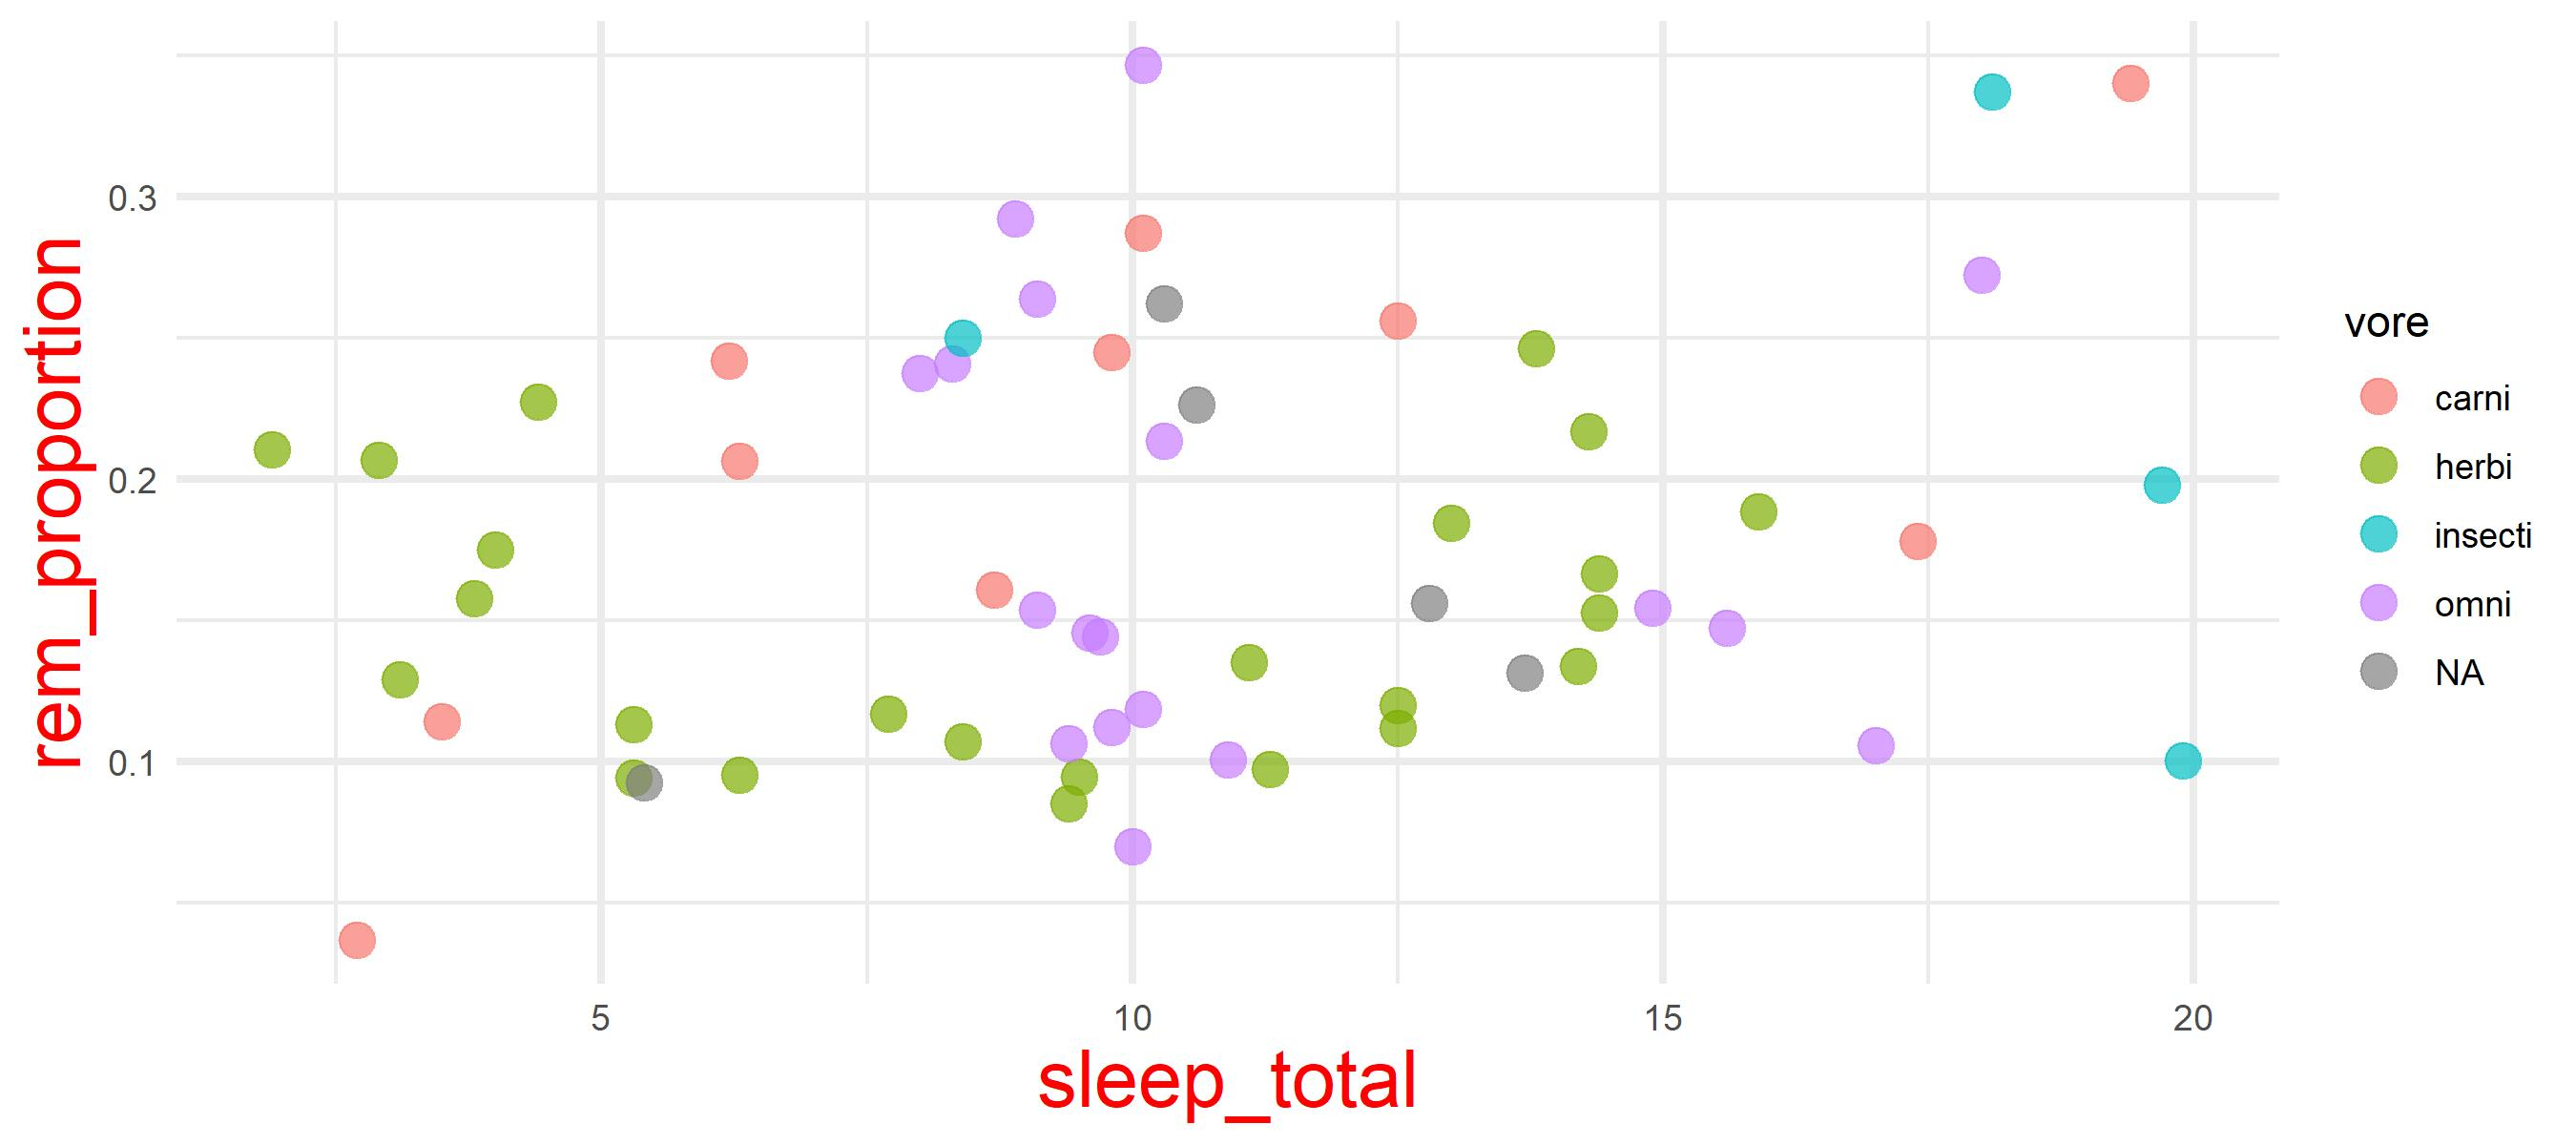

In [30]:
sleepDataExt
    .plot(x="sleep_total", y="rem_proportion", color="vore")
    .geomPoint(size=4.0, alpha=.7)
    .themeMinimal()
    .theme(axisTitle = ElementText(size = 20, color = RColor.red))
    .show()

## Lack of more versatile aestethic mapping


As reported in https://github.com/JetBrains/lets-plot-kotlin/issues/82 data attributes can be mapped to only a few aesthetics  at the moment. E.g., as shown above there is no way to map a data attribute to `size`.

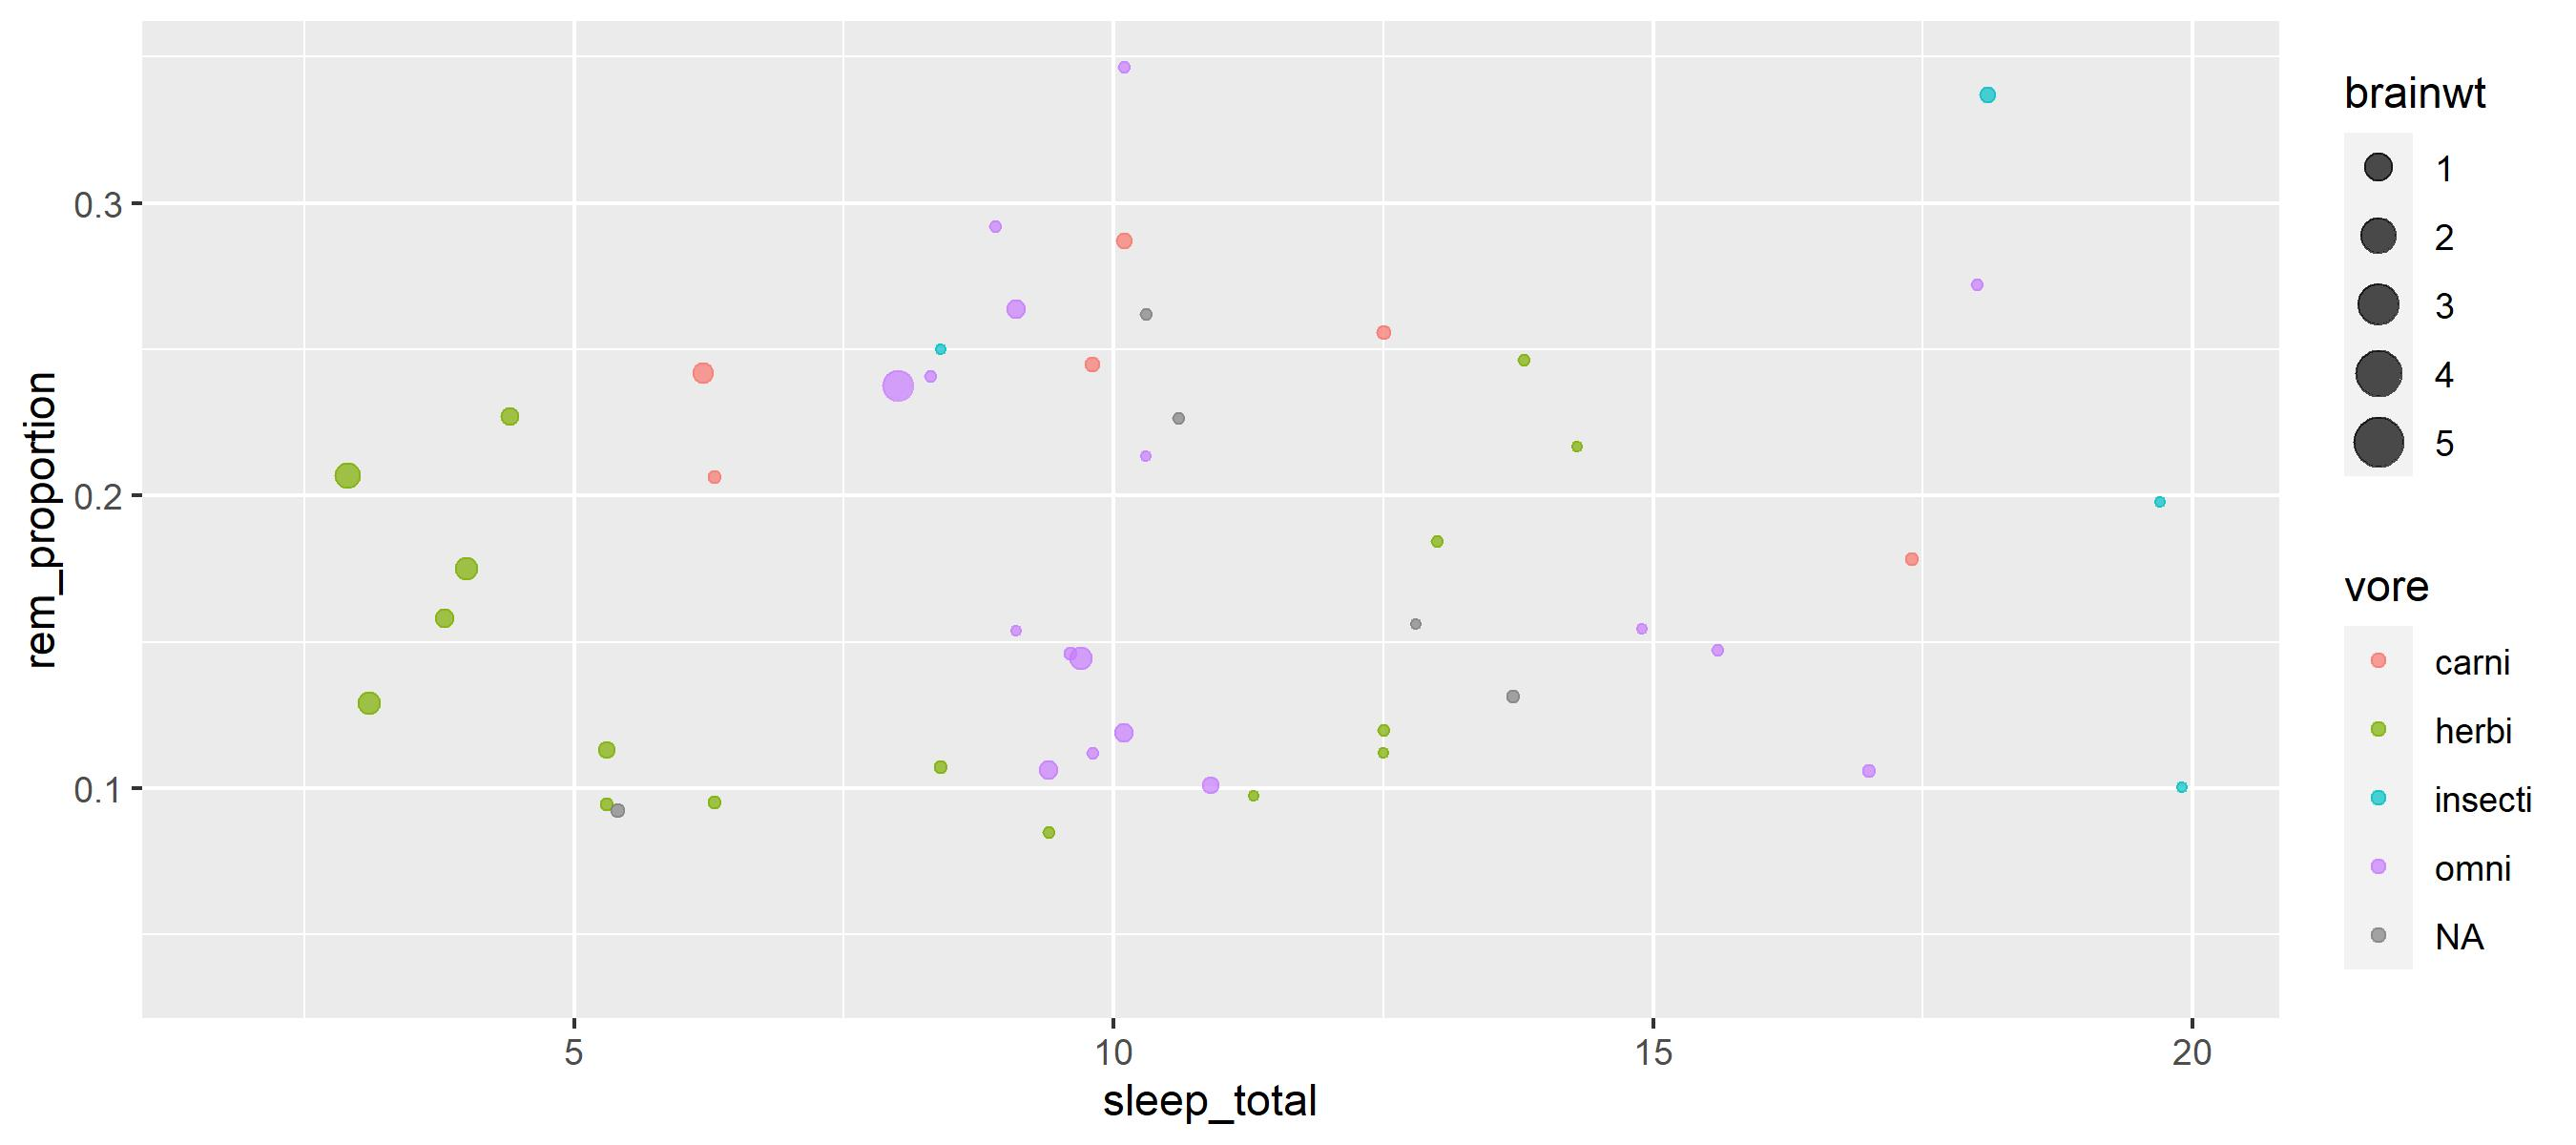

In [31]:
sleepDataExt
    .plot(x="sleep_total", y="rem_proportion", color="vore", size="brainwt")
    .geomPoint(alpha=.7)
    .show()

We find: With this enhanced plot, we can see that _grass-eaters_ with a large brain tend to sleep the least. 


## API Design

It's still unclear - to the author - why `letsplot` is not adopting kotlin conventions to chain plot composition with a `+` and not the more common `.`, which would also allow breaking lines in a more _kotlinequse_ style.

One motivation for doing so might be to provide an easier migration from R, but the resulting API (mix of `.` and `+`) feels inconsistent.

## Just linear trend in geomSmooth

A nice feature of ggplot are the flexible smoothing backend such as 'loess'. Currently it seems only possible to do linear fits with `letsplot/geomSmooth`.

But also here `kravis` could step in if needed.



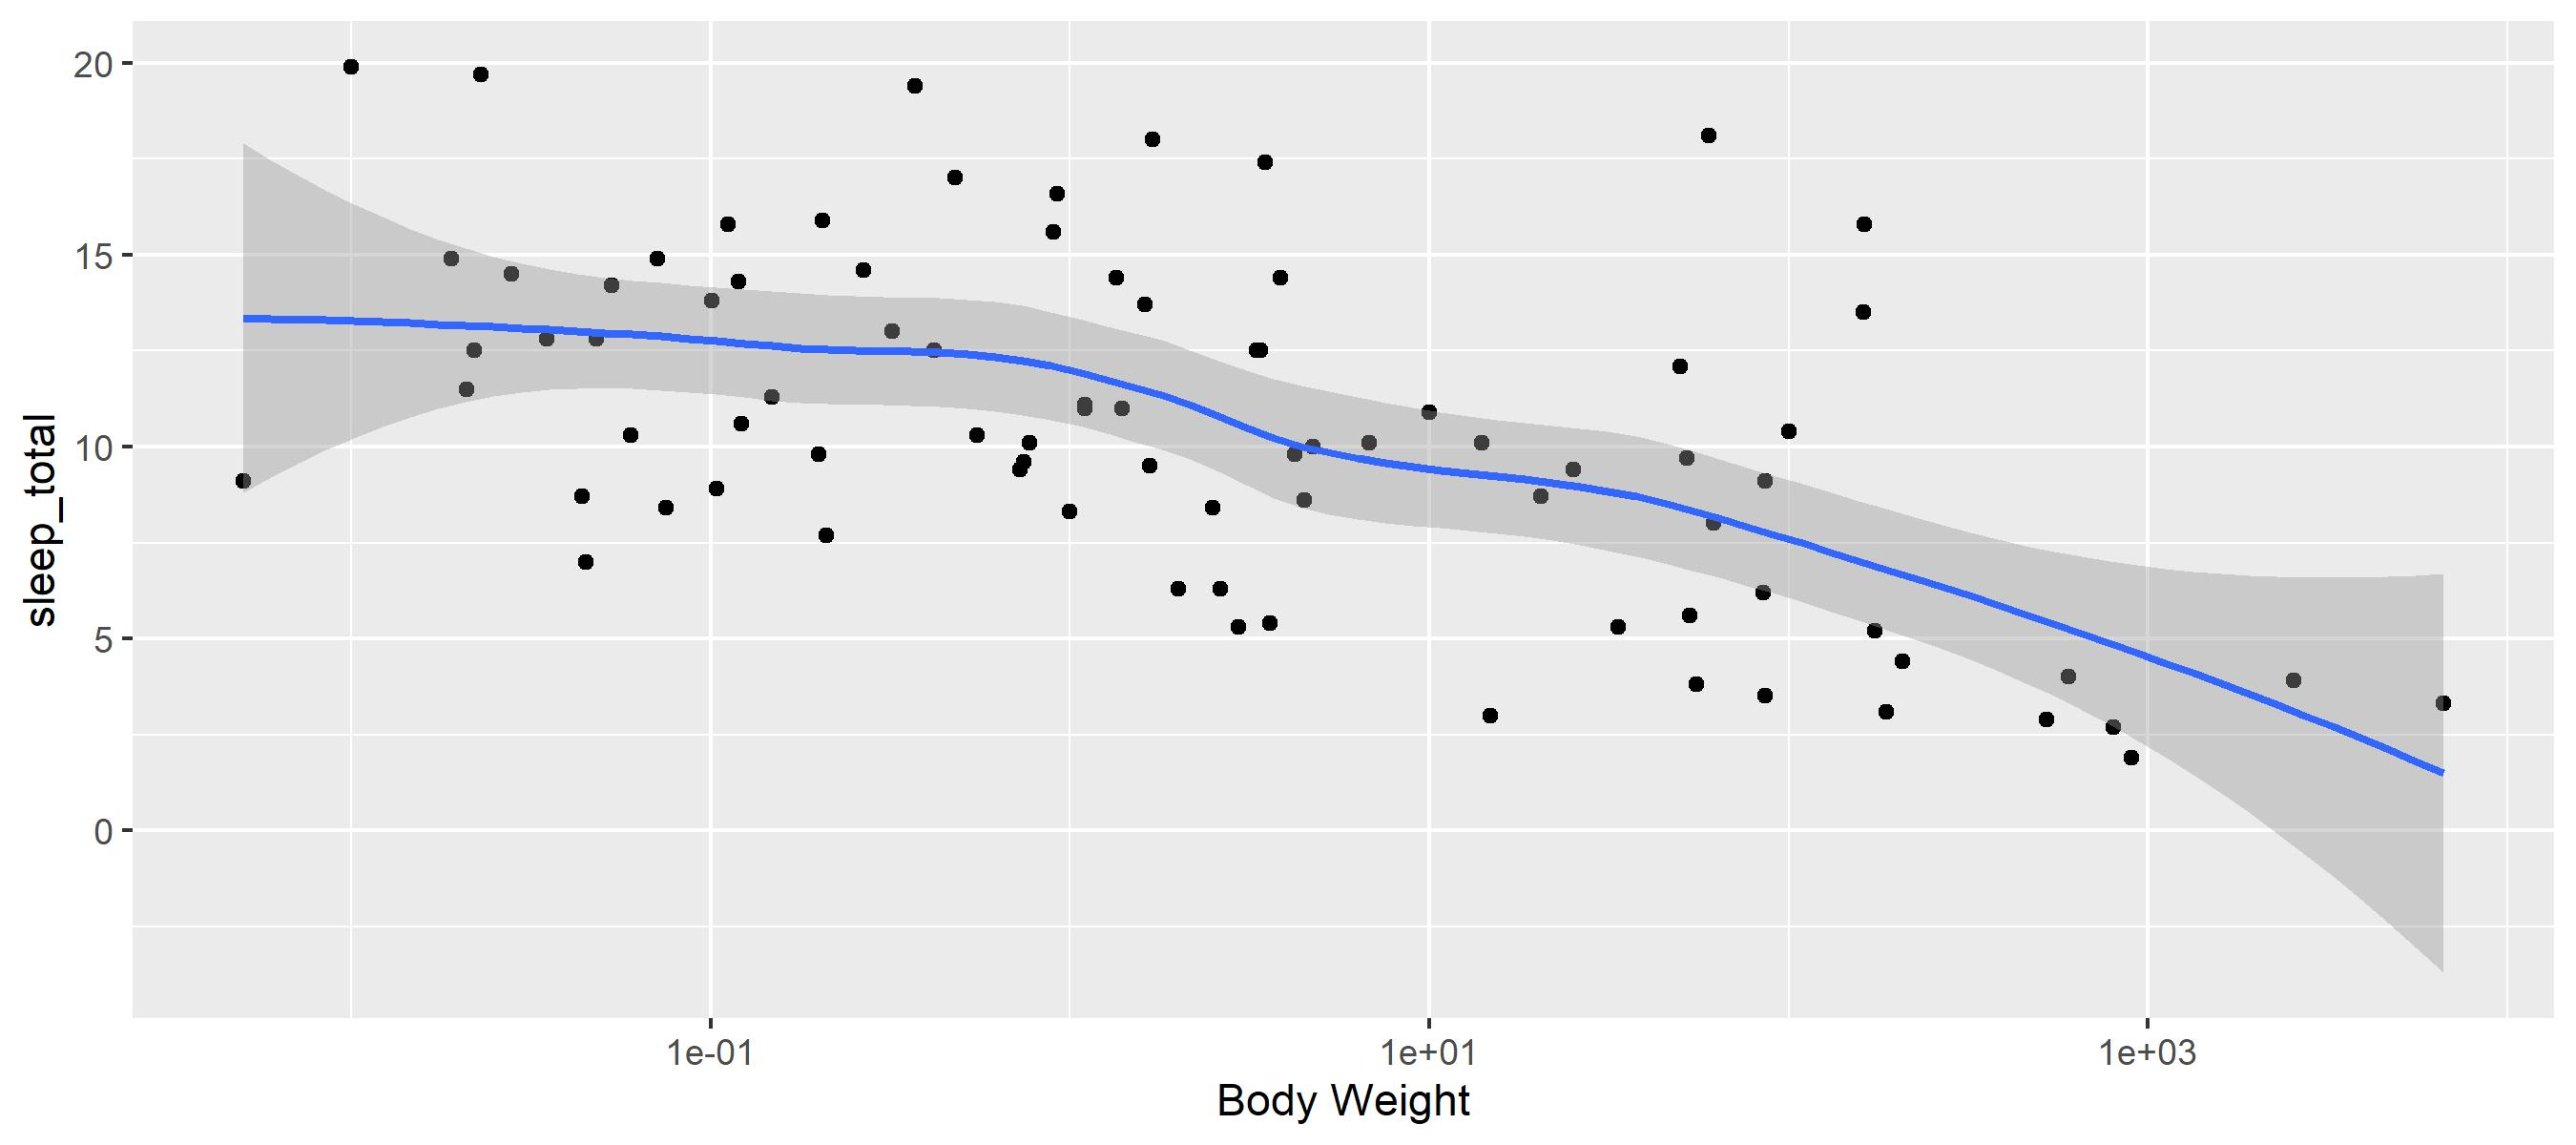

In [32]:
sleepData
    .plot( x="bodywt", y="sleep_total") 
    .xLabel("Body Weight")
    .scaleXLog10()
    .geomPoint()
    .geomSmooth()

# Summary


We've learnt something interesting about biology today. :-)


As we've leared in this tutoral, we can analyze complex data at ease with tools such as `krangl` for data manipulation, and `letsplots` for visualization. Where needed we can complement an analysis also with additional libraries such as `kravis` for more advanced types of visualization.

Supported by the functionality of the [kotlin-kernel](https://github.com/Kotlin/kotlin-jupyter) data science becomes more and more fluent and fun in Kotlin.

For question and comments feel welcome get in touch via [kotlin slack](https://app.slack.com/client/T09229ZC6/C4W52CFEZ) or directly via [twitter](https://twitter.com/holgerbrandl).

If you have enjoyed this tutorial, don't forget to check out http://holgerbrandl.github.io/krangl/ to learn more about data-science with kotlin.
